In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sympy as sym
sym.init_printing()

# Numerično reševanje diferencialnih enačb - začetni problem

### vprašanje 1 (on) - simbolno
y' - y = sin(x)

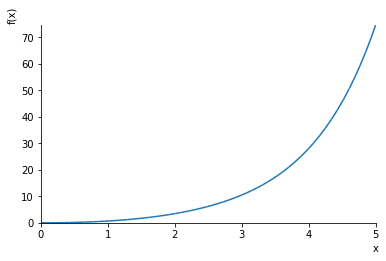

In [3]:
sym.init_printing()
x, y = sym.symbols('x y', positive=True, real=True)
y = y(x)
de = sym.Eq(sym.diff(y, x) - y, sym.sin(x))
rešitev = sym.dsolve(de)
y_res = rešitev.args[1]
C1 = sym.solve(sym.Eq(y_res.subs(x, 0), 0), 'C1')[0]
y_x = y_res.subs('C1', C1)
sym.plot(y_x, (x, 0, 5))

In [4]:
fun_y = sym.lambdify(x, y_x, 'numpy')

In [5]:
def euler(fun, y0, x, *args, **kwargs):
    y = np.zeros((len(x), len(y0)))
    y[0] = np.array(y0).copy()
    h = x[1] - x[0]
    for i, xi in enumerate(x[:-1]): #zadnega x-a nebomo nikoli rabili
        y[i+1] = y[i] + h * fun(xi, y[i], *args, **kwargs) #s trenutnimi vrednostmi računamo naslednjo vrednost
    return y
#args in kwargs če podamo npr. maso v fun

### Vprašanje 2 - numerično z eulerjevo

In [6]:
x_polje = np.linspace(0, 5, 30) #če damo 300 točk napaka dosti manjša - manjši trikotniki
x_polje1 = np.linspace(0, 5, 300)
y0 = [0] #more bit seznam ker euler prebere dolžino tega
def funkcija(x, y):
    return np.sin(x) + y

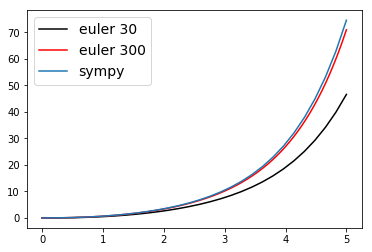

In [7]:
y = euler(fun=funkcija, y0=y0, x=x_polje)
y1 = euler(fun=funkcija, y0=y0, x=x_polje1)
plt.plot(x_polje, y, 'k', label='euler 30') #numerično - približek kvadrati
plt.plot(x_polje1, y1, 'r', label='euler 300')
plt.plot(x_polje, fun_y(x_polje), label='sympy') #sympy je bolj natančna ker upošteva trapeze
plt.legend(fontsize=14);

# Reševanje navadne diferencialne enačbe reda n

### Vprašanje 4 (on) scipy.integrate.odeint(fun(y,x), y0, x)
padalc: y'' = g - (C_D/m)*y'^2

In [8]:
def fun(y, x, g, m, C_D): #vstavimo pomike in hitrosti
    return np.array([y[1], g - C_D/m*y[1]**2]) #prvi odvod (hitrost=iz začetne vrednosti), drugi odvod (pospešek) - nove neznanke 

### Vprašanje 5 

In [9]:
t = np.linspace(0, 30, 100)
g = 9.81
C_D = 0.203
m = 80
y0 = np.array([0, 0]) #dif. en. 2. reda - 2 začetna pogoja

In [10]:
from scipy.integrate import odeint

In [11]:
rešitev = odeint(fun, y0, t, args=(g, m, C_D))
rešitev[:5] #prvi stolpec pomik, drugi stolpec hitrost #100 rešitev za vsak čas

array([[  0.        ,   0.        ],
       [  0.45024174,   2.97046429],
       [  1.79891405,   5.92740005],
       [  4.03989554,   8.85752413],
       [  7.16310678,  11.74803463]])

In [12]:
pomiki = rešitev[:, 0] #prvi stolpec
hitrost = rešitev[:, 1]

In [13]:
pomiki, hitrost = rešitev.T #druga možnost da pretvorimo v vrstice iz stolpcev

In [14]:
hitrost, pospešek = fun(rešitev.T, t, g, m ,C_D) #iz naše funkcije

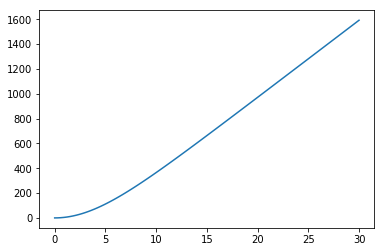

In [15]:
plt.plot(t, pomiki)

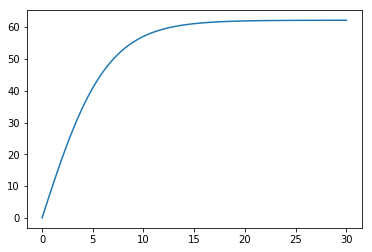

In [16]:
plt.plot(t, hitrost)

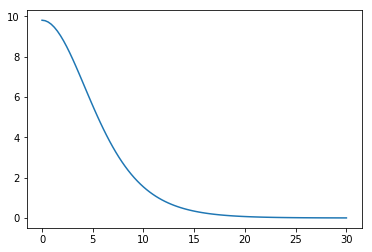

In [17]:
plt.plot(t, pospešek)

# Tako on zahteva v seminarju!

In [18]:
# Uporaba odeint, d.e. 2. reda #pastebin
g = 9.81
m = 80
C_D = 0.203
cas = np.linspace(0,30,100)
y0 = [0, 0]
 
from scipy.integrate import odeint
 
def fun(y, x, g, m, C_D):
    return np.array([y[1], g - C_D/m*y[1]**2])
 
rešitev = odeint(fun, y0, cas, args=(g, m, C_D))
pomiki = rešitev[:, 0]
hitrost = rešitev[:, 1]
pomiki, hitrost = rešitev.T #ali pretvorimo v vrstice
hitrost, pospešek = fun(rešitev.T, cas, g, m, C_D) #določimo pospeške iz enačbe

### Vprašanje 8 (on) ODE - bolj napredno
* pri odeint ne moremo rečt da se ustavi ko pride na določeno višino ... lahko spreminjamo samo čas
* pri ode lahko

In [19]:
from scipy.integrate import ode

In [20]:
#help(ode)

In [21]:
def fun(x, y, g, m, C_D):
    return np.array([y[1], g - C_D/m*y[1]**2])

In [22]:
solver = ode(fun)
solver.set_integrator('dopri5') #podobno RungeKutta
solver.set_initial_value(y0)
solver.set_f_params(g, m, C_D)
dt = 0.05 #želimo rezultat vsake 0.05 sekunde
reš = [y0]
t = [0]
#želimo integrirati do višine 1000 metrov višine
#solver.y[0] - prva stvar ki jo zračuna je višina

while solver.successful() and solver.y[0] <= 1000:
    solver.integrate(solver.t + dt) #se pomikamo za korak dt
    reš.append(solver.y)
    t.append(solver.t) #appendamo trenuten čas integracije, ki smo jo dosegli

reš = np.array(reš)
pomik, hitrost = reš.T #iz stolpične v vrstično obliko z transponiranjem

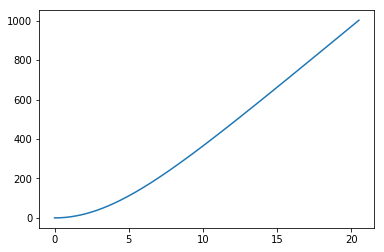

In [23]:
plt.plot(t, pomik)

In [24]:
#drugo leto se bo ta stvar poenostavila glej: solve_ivp

### Vprašanje 6 (on)

In [25]:
m = 0.5
v_0 = 45
c = 0.035
g = 9.81
a_0 = np.pi/5 #rad

In [26]:
y0 = np.array([0, v_0*np.cos(a_0), 0, v_0*np.sin(a_0)]) #pomik x, x komponenta hitrosti, pomik y, y komponenta hitrosti

In [30]:
#... #v predlogi

In [31]:
def fun_odeint(y, x, c, g, m):
    v = np.sqrt(y[1]**2 + y[3]**2)
    alpha = np.arctan2(y[3], y[1])
    F = c * v**(3/2)
    return np.array([y[1], -F*np.cos(alpha)/m, y[3], -F*np.sin(alpha)/m-g])